In [106]:
import pandas as pd
import matplotlib.pyplot as plt


In [121]:
# Load the dataset with 'latin-1' encoding
df = pd.read_csv('Superstore.csv', encoding='latin-1')

# Display the first 5 rows of the DataFrame
print(df.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [69]:
# Check the dimensions of the dataset
print("Dataset shape:", df.shape)

# Check the column names
print("Column names:", df.columns)

# Get an overview of the data types and missing values
print(df.info())

# Summary statistics of numerical columns
print(df.describe())


Dataset shape: (9994, 21)
Column names: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State     

In [70]:
# Total sales
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)

# Top-selling products
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
print("Top Selling Products:")
print(top_products)

#Top-selling Category
top_category = df.groupby('Category')['Sales'].sum().nlargest(10)
print("Top Selling Category:")
print(top_category)

Total Sales: 2297200.8603000003
Top Selling Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64
Top Selling Cat

 Findings;
- The total sales revenue for the superstore is $2,297,200.860

- The highest selling product for the superstore is Canon imageCLASS 2200 Advanced Copier having being sold for $61,599.824

- The highest selling category for the superstore is  Technology, where the sales is $836,154.0330 

In [110]:
# Profit by segment
Profit_by_segment = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
print("Profit by Segment:")
print(Profit_by_segment)

# Profit by Products
Profit_by_product = df.groupby('Product Name')['Profit'].sum().nlargest(10)
print("Profit by product Name:")
print(Profit_by_product)


Profit by Segment:
Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64
Profit by product Name:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Ther

Findings
- The most profitable segment is the Consumer segment.
- The most profitable product is the "Canon imageCLASS 2200 Advanced Copier"

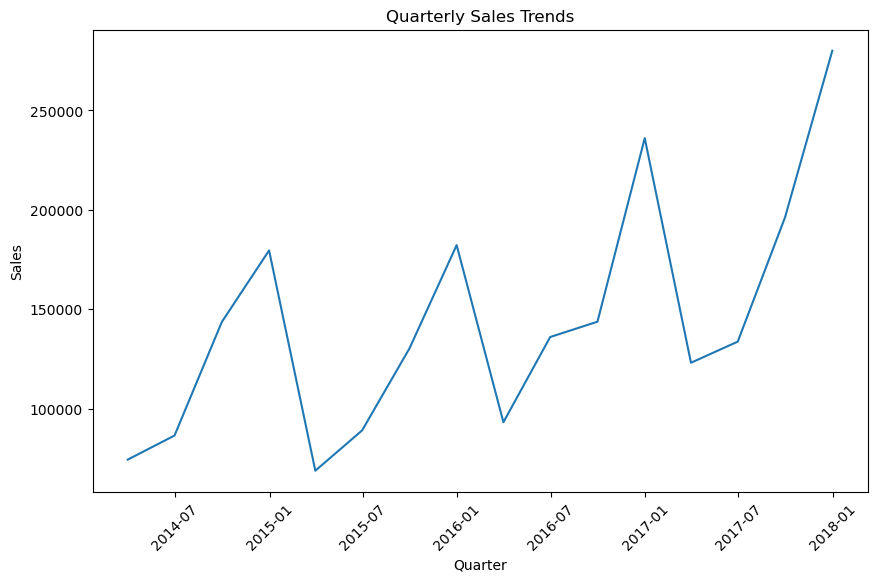

In [122]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the DataFrame index
df.set_index('Order Date', inplace=True)

# Resample the data by quarter and calculate the quarterly sales
quarterly_sales = df['Sales'].resample('Q').sum()

# Plot the quarterly sales trends
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()




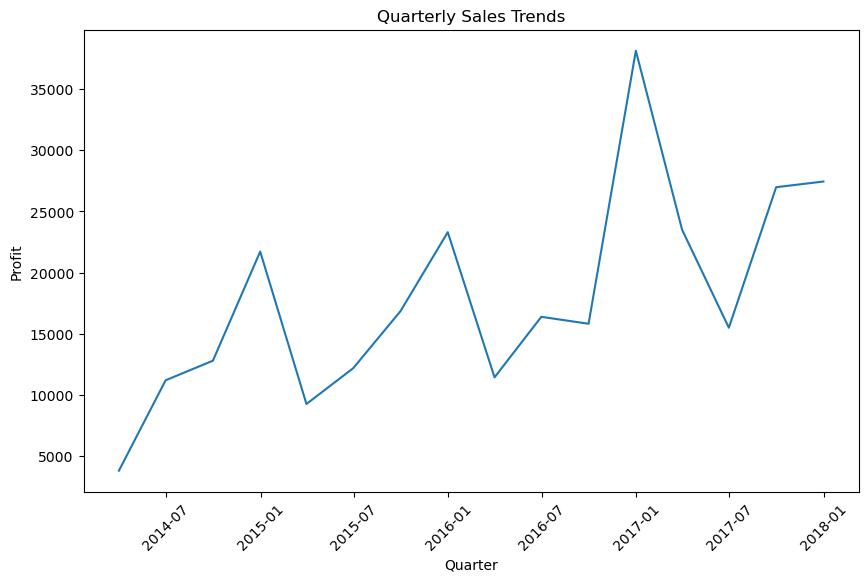

In [120]:
# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Set 'Order Date' as the DataFrame index
df.set_index('Order Date', inplace=True)

# Resample the data by quarter and calculate the quarterly sales
quarterly_sales = df['Profit'].resample('Q').sum()

# Plot the quarterly sales trends
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

Findings
- There is always an increase in sales and Profit in the last quarter of the year.

Recommendations
- Capitalize on Seasonal Demand: Since there is consistently high sales and Profit in the last quarter of the year, it is crucial to fully leverage this seasonal demand. Increase inventory levels and ensure sufficient stock of popular products to meet customer needs during this period. Consider offering special promotions or discounts to attract more customers and drive higher sales.

In [87]:
# Calculate profit margin for each category
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Sort Categories by profit margin in descending order
Category_sorted_by_margin = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)

# Display Categories with the highest profit margins
Category = Category_sorted_by_margin.head(10)
print(Category)


Category
Technology         15.613805
Office Supplies    13.803029
Furniture           3.878353
Name: Profit Margin, dtype: float64


Findings
- The category with the highest profit margin is the Technology Category

In [103]:
# Customer Lifetime Value Analysis

# Calculate the total revenue for each customer
customer_revenue = df.groupby('Customer Name')['Sales'].sum()

# Calculate the average order value for each customer
customer_avg_order_value = df.groupby('Customer Name')['Sales'].mean()

# Calculate the purchase frequency for each customer
customer_purchase_frequency = df.groupby('Customer Name').size()

# Calculate the customer lifetime value (CLV) using a simple formula
customer_clv = customer_avg_order_value * customer_purchase_frequency

# Sort the customers by CLV in descending order
customer_clv_sorted = customer_clv.sort_values(ascending=False)

# Print the top 10 customers with the highest CLV
top_customers = customer_clv_sorted.head(10)
print(top_customers)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
dtype: float64


Findings 
- The most valuable customer is Sean Miller

Recommendation
- Personalized Communication: Maintain regular and personalized communication with these customers. Send them personalized emails, newsletters, or offers to make them feel valued and appreciated. Use their purchase history and preferences to tailor your communication.

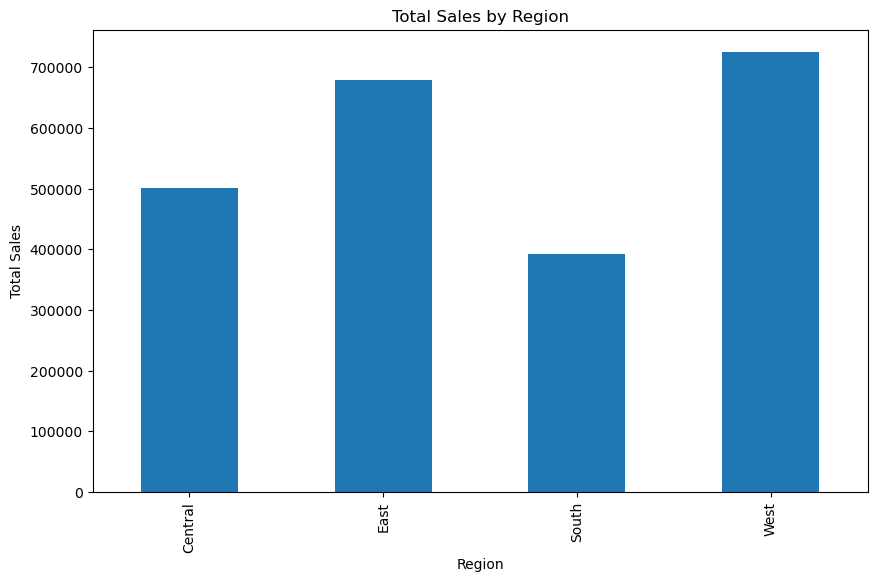

Profit by Region:
Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


In [111]:
# Group the data by region and calculate total sales
region_sales = df.groupby('Region')['Sales'].sum()

# Plot the sales by region
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

Profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print("Profit by Region:")
print(Profit_by_region)

In [95]:
# Group the data by region and product, and calculate the total quantity purchased
region_product_quantity = df.groupby(['Region', 'Category'])['Quantity'].sum()

# Find the region with the highest quantity for each product
most_purchased_region = region_product_quantity.groupby('Category').idxmax()

# Display the region that buys each product the most
print(most_purchased_region)


Category
Furniture                (West, Furniture)
Office Supplies    (West, Office Supplies)
Technology              (West, Technology)
Name: Quantity, dtype: object


Findings
- The Westeren Region has the highest sales potential and it is the most profitable region.
- The Western region is the most purchased region.

Recommendations
- Understand the regions preferences, and tailor marketing campaigns accordingly.

